## Import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [1]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip

--2023-07-06 13:04:15--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-07-06 13:04:15 (240 MB/s) - ‘iris.zip’ saved [3738]



In [4]:
!ls

bezdekIris.data  Index	iris.data  iris.names  iris.zip  sample_data


In [3]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


## Missing Values

In [12]:
df = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### Mean or Mode

In [15]:
df = pd.DataFrame({'Job Position': ['CEO', 'Senior Manager', 'Junior Manager', 'Employee', 'Assistant Staff'], 'Years of Experience':[5, 4, 3, None, 1], 'Salary':[100000,80000,None,40000, 20000]})

In [16]:
df.head()

,Job Position,Years of Experience,Salary
0,CEO,5.0,100000.0
1,Senior Manager,4.0,80000.0
2,Junior Manager,3.0,NaN
3,Employee,NaN,40000.0
4,Assistant Staff,1.0,20000.0


In [17]:
df.isnull().sum()

Job Position           0
Years of Experience    1
Salary                 1
dtype: int64

In [18]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mode()[0])

In [19]:
df.head()

,Job Position,Years of Experience,Salary
0,CEO,5.0,100000.0
1,Senior Manager,4.0,80000.0
2,Junior Manager,3.0,20000.0
3,Employee,NaN,40000.0
4,Assistant Staff,1.0,20000.0


In [20]:
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())

In [21]:
df.head()

,Job Position,Years of Experience,Salary
0,CEO,5.00,100000.0
1,Senior Manager,4.00,80000.0
2,Junior Manager,3.00,20000.0
3,Employee,3.25,40000.0
4,Assistant Staff,1.00,20000.0


In [22]:
df.isnull().sum()

Job Position           0
Years of Experience    0
Salary                 0
dtype: int64

### Imputer

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
data = [[12, np.nan, 34], [10, 32, np.nan], [np.nan, 11, 20]]

print(data)

[[12, nan, 34], [10, 32, nan], [nan, 11, 20]]


In [25]:
imputer = imputer.fit(data)

In [26]:
data = imputer.transform(data)
print(data)

[[12.  21.5 34. ]
 [10.  32.  27. ]
 [11.  11.  20. ]]


## Feature Scaling

In [28]:
df = pd.DataFrame({
    "Weight": [15,18, 12,10],
    "Price": [1, 4, 2, 5]
}, index=['Orange', 'Apple', 'Banana', "Grape"])

In [30]:
df

,Weight,Price
Orange,15,1
Apple,18,4
Banana,12,2
Grape,10,5


### Min Max Scaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
df1 = pd.DataFrame(scaler.fit_transform(df), columns=["Weight", "Price"],
                   index=['Orange', 'Apple', 'Banana', "Grape"])

In [33]:
df1

,Weight,Price
Orange,0.625,0.00
Apple,1.000,0.75
Banana,0.250,0.25
Grape,0.000,1.00


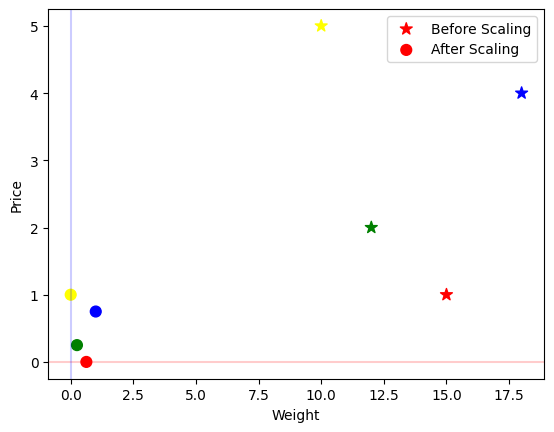

In [36]:
ax = df.plot.scatter(x="Weight", y="Price", color=["red","blue","green","yellow"],
                     marker="*", s=80, label="Before Scaling")

df1.plot.scatter(x="Weight", y="Price", color=["red", "blue", "green", "yellow"],
                     marker="o", s=60, label="After Scaling", ax=ax)

plt.axhline(0, color='red', alpha=0.2)
plt.axvline(0, color='blue', alpha=0.2)

### Standard Scaler

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
df2 = pd.DataFrame(scaler.fit_transform(df), columns=["Weight", "Price"],
                   index=['Orange', 'Apple', 'Banana', "Grape"])

In [44]:
df2

,Weight,Price
Orange,0.412393,-1.264911
Apple,1.402136,0.632456
Banana,-0.577350,-0.632456
Grape,-1.237179,1.264911


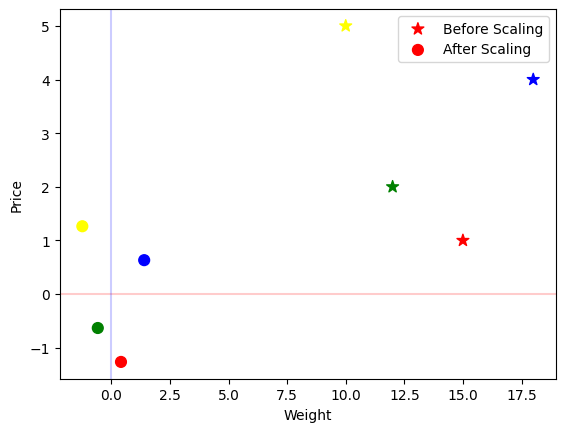

In [45]:
ax = df.plot.scatter(x="Weight", y="Price", color=["red","blue","green","yellow"],
                     marker="*", s=80, label="Before Scaling")

df2.plot.scatter(x="Weight", y="Price", color=["red", "blue", "green", "yellow"],
                     marker="o", s=60, label="After Scaling", ax=ax)

plt.axhline(0, color='red', alpha=0.2)
plt.axvline(0, color='blue', alpha=0.2)

## Feature Encoding

### One Hot Encoding




Dataset:

[Cars India](https://www.kaggle.com/datasets/vysakhvms/cars-india-dataset?resource=download)

In [52]:
# this is for input data
df = pd.read_csv("Cars India Dataset.csv")

In [53]:
df.head()

,Model,Maker,Type,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,...,Rear Brake,Drive,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Emission Type,Tyre Size,Variants,NCAP Rating
0,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,19.40,BS VI,205/55 R16,3,Not Tested
1,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,18.12,BS VI,205/55 R16,2,Not Tested
2,Virtus,Volkswagen,Sedan,5,1498.0,4561,1752,1507,2651,4.0,...,Drum,2WD,5.05,45.0,521.0,18.67,BS VI,205/55 R16,1,Not Tested
3,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,19.20,BS VI,205/55 R17,3,5
4,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,17.23,BS VI,205/55 R17,2,5


In [57]:
df["Type"].value_counts()

SUV              71
Compact SUV      25
Hatchback        20
Sedan            13
MUV              10
Compact Sedan     8
Mid Size SUV      4
MPV               4
Sports Car        1
Name: Type, dtype: int64

In [58]:
# one hot encoding(for column - Type)
pd.get_dummies(df, columns=["Type"])

,Model,Maker,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,Fuel,...,NCAP Rating,Type_Compact SUV,Type_Compact Sedan,Type_Hatchback,Type_MPV,Type_MUV,Type_Mid Size SUV,Type_SUV,Type_Sedan,Type_Sports Car
0,Virtus,Volkswagen,5,999.0,4561,1752,1507,2651,3.0,Petrol,...,Not Tested,0,0,0,0,0,0,0,1,0
1,Virtus,Volkswagen,5,999.0,4561,1752,1507,2651,3.0,Petrol,...,Not Tested,0,0,0,0,0,0,0,1,0
2,Virtus,Volkswagen,5,1498.0,4561,1752,1507,2651,4.0,Petrol,...,Not Tested,0,0,0,0,0,0,0,1,0
3,Taigun,Volkswagen,5,999.0,4221,1760,1612,2651,3.0,Petrol,...,5,0,0,0,0,0,1,0,0,0
4,Taigun,Volkswagen,5,999.0,4221,1760,1612,2651,3.0,Petrol,...,5,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Harrier,Tata,5,1956.0,4598,1894,1706,2741,4.0,Diesel,...,6,0,0,0,0,0,0,1,0,0
152,Safari,Tata,6,1956.0,4661,1894,1786,2741,4.0,Diesel,...,6,0,0,0,0,0,0,1,0,0
153,Safari,Tata,6,1956.0,4661,1894,1786,2741,4.0,Diesel,...,6,0,0,0,0,0,0,1,0,0
154,Safari,Tata,7,1956.0,4661,1894,1786,2741,4.0,Diesel,...,6,0,0,0,0,0,0,1,0,0


### Label Encoding

In [59]:
# this is for label data(result)
df = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [60]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder = LabelEncoder()

In [64]:
df['class'] = encoder.fit_transform(df['class'])

In [65]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
df["class"].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64